## Cleaning the dataset for Rent score

Cleaning the data for rent score and getting the rent score value

In [9]:
#import necessary packages
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

import geopandas as gpd

from shapely.geometry import Point

from haversine import haversine, Unit

from sklearn.preprocessing import MinMaxScaler

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
# storefront vacancy stats
storefront = pd.read_csv("Storefront_Registration_Class_2_and_4_Statistics_20250530.csv")

In [12]:
storefront.head()

,Reporting Year,"Aggregate Level (Citywide, Borough, Council District, Census Tract)",Aggregate Level ID,Total #Storefronts,Median Square Feet,Average Square Feet,#Storefront leased to tenants,#Storefront leased and not operating on 12/31,Median Monthly Rent Per Square Foot,Average Monthly Rent Per Square Foot,Median Years Leased,Average Years Leased,#Storefronts with Leases Ending after 12/31,Median Years Lease Term Remaining after 12/31,Average Years Lease Term Remaining after 12/31,Number whose lease is due to expire within the two years after 6/1,#Storefront Reported Occupied by Owner,Median Years Occupied by Owner,Average Years Occupied by Owner,#Storefront reported Not Leased and Not Owner Occupied,Median Years Not Leased and Not Owner Occupied,Average Years Not Leased and Not Owner Occupied,#Storefront under construction with DOB Projects Listed,Median years for construction projects,Average years for construction projects
0,2019,CENSUS TRACT,2.0089.00,57,850,1990,47,NaN,3,5.38,5,7.27,36,3.13,4.18,14,*,*,*,*,*,*,0,0,0
1,2019,CENSUS TRACT,2.0244.00,22,950,1377,18,NaN,2.17,2.43,1.58,3.99,*,*,*,*,*,*,*,*,*,*,0,0,0
2,2019,CENSUS TRACT,3.0363.00,12,886,3515,*,NaN,*,*,*,*,*,*,*,*,0,0,0,*,*,*,0,0,0
3,2019,CENSUS TRACT,3.0364.00,17,2000,1881,13,NaN,4.14,4.32,6,6.87,*,*,*,*,*,*,*,*,*,*,0,0,0
4,2019,CENSUS TRACT,3.0366.00,13,800,1358,12,NaN,5.97,5.4,1,2.25,*,*,*,0,*,*,*,*,*,*,0,0,0


In [13]:
storefront.columns

Index(['Reporting Year',
       'Aggregate Level (Citywide, Borough, Council District, Census Tract)',
       'Aggregate Level ID', 'Total #Storefronts', 'Median Square Feet',
       'Average Square Feet', '#Storefront leased to tenants',
       '#Storefront leased and not operating on 12/31',
       'Median Monthly Rent Per Square Foot',
       'Average Monthly Rent Per Square Foot', 'Median Years Leased',
       'Average Years Leased', '#Storefronts with Leases Ending after 12/31',
       'Median Years Lease Term Remaining after 12/31',
       'Average Years Lease Term Remaining after 12/31',
       'Number whose lease is due to expire within the two years after 6/1',
       '#Storefront Reported Occupied by Owner',
       'Median Years Occupied by Owner', 'Average Years Occupied by Owner',
       '#Storefront reported Not Leased and Not Owner Occupied',
       'Median Years Not Leased and Not Owner Occupied',
       'Average Years Not Leased and Not Owner Occupied',
       '#Storefr

In [14]:
#Cleaning column names
column_mapping = {
    'Aggregate Level (Citywide, Borough, Council District, Census Tract)': 'Aggregate_Level',
    'Aggregate Level ID': 'Aggregate_Level_ID',
    'Total #Storefronts': 'Total_Storefronts',
    'Median Square Feet': 'Median_Square_Feet',
    'Average Square Feet': 'Average_Square_Feet',
    '#Storefront reported Not Leased and Not Owner Occupied': 'Vacant_Storefronts_Count',
    '#Storefront leased to tenants': 'Storefronts_Leased',
    '#Storefront leased and not operating on 12/31': 'Storefronts_Leased_Not_Operating',
    'Median Monthly Rent Per Square Foot': 'Median_Monthly_Rent_PSF',
    'Average Monthly Rent Per Square Foot': 'Average_Monthly_Rent_PSF',
    'Median Years Leased': 'Median_Years_Leased',
    'Average Years Leased': 'Average_Years_Leased',
    '#Storefronts with Leases Ending after 12/31': 'Leases_Ending_Soon_Count',
    'Median Years Lease Term Remaining after 12/31': 'Median_Years_Lease_Remaining',
    'Average Years Lease Term Remaining after 12/31': 'Average_Years_Lease_Remaining',
    'Number whose lease is due to expire within the two years after 6/1': 'Lease_Expire_2_Years_Count',
    '#Storefront Reported Occupied by Owner': 'Storefronts_Occupied_By_Owner',
    'Median Years Occupied by Owner': 'Median_Years_Occupied_By_Owner',
    'Average Years Occupied by Owner': 'Average_Years_Occupied_By_Owner',
    'Median Years Not Leased and Not Owner Occupied': 'Median_Years_Not_Leased_Not_Owner',
    'Average Years Not Leased and Not Owner Occupied': 'Average_Years_Not_Leased_Not_Owner',
    '#Storefront under construction with DOB Projects Listed': 'Under_Construction_Count',
    'Median years for construction projects': 'Median_Years_Construction',
    'Average years for construction projects': 'Average_Years_Construction'
}

storefront = storefront.rename(columns=column_mapping)

In [15]:
#Filter for Census Tract data
storefront = storefront[storefront['Aggregate_Level'] == 'Census Tract'].copy()



In [16]:
storefront.dtypes

Reporting Year                         int64
Aggregate_Level                       object
Aggregate_Level_ID                    object
Total_Storefronts                      int64
Median_Square_Feet                    object
Average_Square_Feet                   object
Storefronts_Leased                    object
Storefronts_Leased_Not_Operating      object
Median_Monthly_Rent_PSF               object
Average_Monthly_Rent_PSF              object
Median_Years_Leased                   object
Average_Years_Leased                  object
Leases_Ending_Soon_Count              object
Median_Years_Lease_Remaining          object
Average_Years_Lease_Remaining         object
Lease_Expire_2_Years_Count            object
Storefronts_Occupied_By_Owner         object
Median_Years_Occupied_By_Owner        object
Average_Years_Occupied_By_Owner       object
Vacant_Storefronts_Count              object
Median_Years_Not_Leased_Not_Owner     object
Average_Years_Not_Leased_Not_Owner    object
Under_Cons

In [17]:
#check columns for special values like '*'
columns_to_convert_with_replace = [
    'Total_Storefronts',
    'Average_Square_Feet',
    'Vacant_Storefronts_Count',
    'Storefronts_Leased',
    'Storefronts_Leased_Not_Operating',
    'Median_Monthly_Rent_PSF',
    'Average_Monthly_Rent_PSF',
    'Median_Years_Leased',
    'Average_Years_Leased',
    'Leases_Ending_Soon_Count',
    'Median_Years_Lease_Remaining',
    'Average_Years_Lease_Remaining',
    'Lease_Expire_2_Years_Count',
    'Storefronts_Occupied_By_Owner',
    'Median_Years_Occupied_By_Owner',
    'Average_Years_Occupied_By_Owner',
    'Median_Years_Not_Leased_Not_Owner',
    'Average_Years_Not_Leased_Not_Owner',
    'Under_Construction_Count',
    'Median_Years_Construction',
    'Average_Years_Construction'
]

In [18]:
for col_name in columns_to_convert_with_replace:
    storefront[col_name] = storefront[col_name].astype(str).str.replace('*', '0', regex=False)
    storefront[col_name] = storefront[col_name].astype(str).str.replace('(D)', '0', regex=False) # Example for (D)
    storefront[col_name] = storefront[col_name].astype(str).str.replace(',', '', regex=False) # Remove commas for numbers like '1,000'

    storefront[col_name] = pd.to_numeric(storefront[col_name], errors='coerce')


In [19]:
storefront.isna().sum()

Reporting Year                           0
Aggregate_Level                          0
Aggregate_Level_ID                       0
Total_Storefronts                        0
Median_Square_Feet                       0
Average_Square_Feet                      0
Storefronts_Leased                       0
Storefronts_Leased_Not_Operating      1109
Median_Monthly_Rent_PSF                  0
Average_Monthly_Rent_PSF                 0
Median_Years_Leased                      0
Average_Years_Leased                     0
Leases_Ending_Soon_Count                28
Median_Years_Lease_Remaining            15
Average_Years_Lease_Remaining           15
Lease_Expire_2_Years_Count             163
Storefronts_Occupied_By_Owner          291
Median_Years_Occupied_By_Owner         154
Average_Years_Occupied_By_Owner        154
Vacant_Storefronts_Count               302
Median_Years_Not_Leased_Not_Owner      148
Average_Years_Not_Leased_Not_Owner     148
Under_Construction_Count              2589
Median_Year

In [20]:
#Replace missing values w 0
storefront=storefront.fillna(0)

In [21]:
storefront.dtypes

Reporting Year                          int64
Aggregate_Level                        object
Aggregate_Level_ID                     object
Total_Storefronts                       int64
Median_Square_Feet                     object
Average_Square_Feet                   float64
Storefronts_Leased                      int64
Storefronts_Leased_Not_Operating      float64
Median_Monthly_Rent_PSF               float64
Average_Monthly_Rent_PSF              float64
Median_Years_Leased                   float64
Average_Years_Leased                  float64
Leases_Ending_Soon_Count              float64
Median_Years_Lease_Remaining          float64
Average_Years_Lease_Remaining         float64
Lease_Expire_2_Years_Count            float64
Storefronts_Occupied_By_Owner         float64
Median_Years_Occupied_By_Owner        float64
Average_Years_Occupied_By_Owner       float64
Vacant_Storefronts_Count              float64
Median_Years_Not_Leased_Not_Owner     float64
Average_Years_Not_Leased_Not_Owner

In [22]:
storefront.isna().sum()

Reporting Year                        0
Aggregate_Level                       0
Aggregate_Level_ID                    0
Total_Storefronts                     0
Median_Square_Feet                    0
Average_Square_Feet                   0
Storefronts_Leased                    0
Storefronts_Leased_Not_Operating      0
Median_Monthly_Rent_PSF               0
Average_Monthly_Rent_PSF              0
Median_Years_Leased                   0
Average_Years_Leased                  0
Leases_Ending_Soon_Count              0
Median_Years_Lease_Remaining          0
Average_Years_Lease_Remaining         0
Lease_Expire_2_Years_Count            0
Storefronts_Occupied_By_Owner         0
Median_Years_Occupied_By_Owner        0
Average_Years_Occupied_By_Owner       0
Vacant_Storefronts_Count              0
Median_Years_Not_Leased_Not_Owner     0
Average_Years_Not_Leased_Not_Owner    0
Under_Construction_Count              0
Median_Years_Construction             0
Average_Years_Construction            0


In [23]:
storefront['Aggregate_Level'].nunique()

1

In [24]:
#remove constant feature
storefront = storefront.drop('Aggregate_Level', axis = 1)

In [25]:
storefront.head()

,Reporting Year,Aggregate_Level_ID,Total_Storefronts,Median_Square_Feet,Average_Square_Feet,Storefronts_Leased,Storefronts_Leased_Not_Operating,Median_Monthly_Rent_PSF,Average_Monthly_Rent_PSF,Median_Years_Leased,Average_Years_Leased,Leases_Ending_Soon_Count,Median_Years_Lease_Remaining,Average_Years_Lease_Remaining,Lease_Expire_2_Years_Count,Storefronts_Occupied_By_Owner,Median_Years_Occupied_By_Owner,Average_Years_Occupied_By_Owner,Vacant_Storefronts_Count,Median_Years_Not_Leased_Not_Owner,Average_Years_Not_Leased_Not_Owner,Under_Construction_Count,Median_Years_Construction,Average_Years_Construction
1585,2020,1.0000.00,21,"1,488.00",1915.10,15,0.0,5.00,50.65,14.97,19.04,14.0,4.83,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1586,2020,1.0002.01,12,783.50,941.00,11,0.0,7.00,7.00,10.01,10.27,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1587,2020,1.0006.00,101,600.00,940.95,73,11.0,6.00,9.91,7.00,7.67,59.0,2.67,3.52,21.0,0.0,0.0,0.0,26.0,1.0,1.10,0.0,0.0,0.0
1588,2020,1.0007.00,110,"2,521.50",7959.21,89,0.0,8.00,14.17,11.97,12.98,78.0,6.58,7.16,10.0,0.0,0.0,0.0,19.0,1.0,1.02,0.0,0.0,0.0
1589,2020,1.0008.00,261,605.00,1000.43,193,24.0,5.69,10.01,4.58,8.13,118.0,2.37,5.42,51.0,0.0,0.0,0.0,59.0,1.0,1.37,0.0,0.0,0.0


In [26]:
#calculate total ft
storefront["total_sq_ft"] = storefront["Total_Storefronts"] * storefront["Average_Square_Feet"]
storefront["vacant_sq_ft"] = storefront["Vacant_Storefronts_Count"] * storefront["Average_Square_Feet"]


In [27]:
#build tract key
storefront["tract_id"] = storefront["Aggregate_Level_ID"].astype(str).str.zfill(6)
storefront["tract_id"] = storefront["tract_id"].str.zfill(7) 


In [28]:
# Compute vacancy rate per Tract
storefront_by_tract = storefront.groupby("tract_id").agg({
    "total_sq_ft": "sum",
    "vacant_sq_ft": "sum"
}).reset_index()
storefront_by_tract["vacancy_rate"] = storefront_by_tract["vacant_sq_ft"] / storefront_by_tract["total_sq_ft"]


In [29]:
storefront_by_tract.head()

,tract_id,total_sq_ft,vacant_sq_ft,vacancy_rate
0,0000001,817034.00,0.0,0.000000
1,0000003,208624.00,84252.0,0.403846
2,0000004,139568.00,0.0,0.000000
3,1.0000.00,154415.10,0.0,0.000000
4,1.0002.01,37828.04,0.0,0.000000


In [30]:
storefront.head()

,Reporting Year,Aggregate_Level_ID,Total_Storefronts,Median_Square_Feet,Average_Square_Feet,Storefronts_Leased,Storefronts_Leased_Not_Operating,Median_Monthly_Rent_PSF,Average_Monthly_Rent_PSF,Median_Years_Leased,Average_Years_Leased,Leases_Ending_Soon_Count,Median_Years_Lease_Remaining,Average_Years_Lease_Remaining,Lease_Expire_2_Years_Count,Storefronts_Occupied_By_Owner,Median_Years_Occupied_By_Owner,Average_Years_Occupied_By_Owner,Vacant_Storefronts_Count,Median_Years_Not_Leased_Not_Owner,Average_Years_Not_Leased_Not_Owner,Under_Construction_Count,Median_Years_Construction,Average_Years_Construction,total_sq_ft,vacant_sq_ft,tract_id
1585,2020,1.0000.00,21,"1,488.00",1915.10,15,0.0,5.00,50.65,14.97,19.04,14.0,4.83,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,40217.10,0.00,1.0000.00
1586,2020,1.0002.01,12,783.50,941.00,11,0.0,7.00,7.00,10.01,10.27,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,11292.00,0.00,1.0002.01
1587,2020,1.0006.00,101,600.00,940.95,73,11.0,6.00,9.91,7.00,7.67,59.0,2.67,3.52,21.0,0.0,0.0,0.0,26.0,1.0,1.10,0.0,0.0,0.0,95035.95,24464.70,1.0006.00
1588,2020,1.0007.00,110,"2,521.50",7959.21,89,0.0,8.00,14.17,11.97,12.98,78.0,6.58,7.16,10.0,0.0,0.0,0.0,19.0,1.0,1.02,0.0,0.0,0.0,875513.10,151224.99,1.0007.00
1589,2020,1.0008.00,261,605.00,1000.43,193,24.0,5.69,10.01,4.58,8.13,118.0,2.37,5.42,51.0,0.0,0.0,0.0,59.0,1.0,1.37,0.0,0.0,0.0,261112.23,59025.37,1.0008.00


Map to NTA

In [31]:
filepath = '2020_Census_Tracts_to_2020_NTAs_and_CDTAs_Equivalency_20250601.csv'

In [57]:
equiv = pd.read_csv('2020_Census_Tracts_to_2020_NTAs_and_CDTAs_Equivalency_20250601.csv')


In [58]:
equiv.head()

,GEOID,CountyFIPS,BoroCode,BoroName,BoroCT2020,CT2020,CTLabel,NTACode,NTAType,NTAName,NTAAbbrev,CDTACode,CDTAType,CDTAName
0,36005001901,5,2,Bronx,2001901,1901,19.01,BX0101,0,Mott Haven-Port Morris,MttHvn,BX01,CD,BX01 Melrose-Mott Haven-Port Morris (CD 1 Appr...
1,36005001902,5,2,Bronx,2001902,1902,19.02,BX0101,0,Mott Haven-Port Morris,MttHvn,BX01,CD,BX01 Melrose-Mott Haven-Port Morris (CD 1 Appr...
2,36005001903,5,2,Bronx,2001903,1903,19.03,BX0101,0,Mott Haven-Port Morris,MttHvn,BX01,CD,BX01 Melrose-Mott Haven-Port Morris (CD 1 Appr...
3,36005002300,5,2,Bronx,2002300,2300,23.00,BX0101,0,Mott Haven-Port Morris,MttHvn,BX01,CD,BX01 Melrose-Mott Haven-Port Morris (CD 1 Appr...
4,36005002500,5,2,Bronx,2002500,2500,25.00,BX0101,0,Mott Haven-Port Morris,MttHvn,BX01,CD,BX01 Melrose-Mott Haven-Port Morris (CD 1 Appr...


In [40]:
equiv['BoroName'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [59]:
equiv = equiv[equiv['BoroName'] == 'Manhattan']

In [60]:
equiv = equiv.drop('BoroName', axis=1)

In [62]:
equiv["tract_id"] = equiv["BoroCode"].astype(str) + equiv["CT2020"].astype(str).str.zfill(6)

In [65]:
# Merge
storefront_with_nta = pd.merge(
    storefront_by_tract, equiv[["tract_id", "NTACode", "NTAName"]],
    on="tract_id", how="left"
)

NTA level income data processing

In [66]:
econ = pd.read_excel("Econ_1822_NTA.xlsx")

In [67]:
econ.head()

,GeoType,NTAType,GeogName,GeoID,Borough,Pop16plE,Pop16plM,Pop16plC,Pop16plP,Pop16plZ,LFE,LFM,LFC,LFP,LFZ,CvLF1E,CvLF1M,CvLF1C,CvLF1P,CvLF1Z,CvEm16pl1E,CvEm16pl1M,CvEm16pl1C,CvEm16pl1P,CvEm16pl1Z,CvLFUEm1E,CvLFUEm1M,CvLFUEm1C,CvLFUEm1P,CvLFUEm1Z,LFArmdFE,LFArmdFM,LFArmdFC,LFArmdFP,LFArmdFZ,NLF1E,NLF1M,NLF1C,NLF1P,NLF1Z,CvLF2E,CvLF2M,CvLF2C,CvLF2P,CvLF2Z,CvLFUEm2E,CvLFUEm2M,CvLFUEm2C,CvLFUEm2P,CvLFUEm2Z,F16plE,F16plM,F16plC,F16plP,F16plZ,F16plLFE,F16plLFM,F16plLFC,F16plLFP,F16plLFZ,F16plCvLFE,F16plCvLFM,F16plCvLFC,F16plCvLFP,F16plCvLFZ,F16plCLFEE,F16plCLFEM,F16plCLFEC,F16plCLFEP,F16plCLFEZ,OChU6E,OChU6M,OChU6C,OChU6P,OChU6Z,OChU6PLFE,OChU6PLFM,OChU6PLFC,OChU6PLFP,OChU6PLFZ,OCh6t17E,OCh6t17M,OCh6t17C,OCh6t17P,OCh6t17Z,OC6t17PLFE,OC6t17PLFM,OC6t17PLFC,OC6t17PLFP,OC6t17PLFZ,Wrkr16plE,Wrkr16plM,Wrkr16plC,Wrkr16plP,Wrkr16plZ,CW_DrvAlnE,CW_DrvAlnM,CW_DrvAlnC,CW_DrvAlnP,CW_DrvAlnZ,CW_CrpldE,CW_CrpldM,CW_CrpldC,CW_CrpldP,CW_CrpldZ,CW_PbTrnsE,CW_PbTrnsM,CW_PbTrnsC,CW_PbTrnsP,CW_PbTrnsZ,CW_WlkdE,CW_WlkdM,CW_WlkdC,CW_WlkdP,CW_WlkdZ,CW_OthE,CW_OthM,CW_OthC,CW_OthP,CW_OthZ,CW_WrkdHmE,CW_WrkdHmM,CW_WrkdHmC,CW_WrkdHmP,CW_WrkdHmZ,MnTrvTmE,MnTrvTmM,MnTrvTmC,MnTrvTmP,MnTrvTmZ,CvEm16pl2E,CvEm16pl2M,CvEm16pl2C,CvEm16pl2P,CvEm16pl2Z,MgBSciArtE,MgBSciArtM,MgBSciArtC,MgBSciArtP,MgBSciArtZ,SrvcE,SrvcM,SrvcC,SrvcP,SrvcZ,SalesOffE,SalesOffM,SalesOffC,SalesOffP,SalesOffZ,NRCnstMntE,NRCnstMntM,NRCnstMntC,NRCnstMntP,NRCnstMntZ,PrdTrnsMME,PrdTrnsMMM,PrdTrnsMMC,PrdTrnsMMP,PrdTrnsMMZ,CvEm16pl3E,CvEm16pl3M,CvEm16pl3C,CvEm16pl3P,CvEm16pl3Z,AgFFHME,AgFFHMM,AgFFHMC,AgFFHMP,AgFFHMZ,ConstctnE,ConstctnM,ConstctnC,ConstctnP,ConstctnZ,MnfctrngE,MnfctrngM,MnfctrngC,MnfctrngP,MnfctrngZ,WhlsaleE,WhlsaleM,WhlsaleC,WhlsaleP,WhlsaleZ,RetailE,RetailM,RetailC,RetailP,RetailZ,TrWHUtE,TrWHUtM,TrWHUtC,TrWHUtP,TrWHUtZ,InfoE,InfoM,InfoC,InfoP,InfoZ,FIREE,FIREM,FIREC,FIREP,FIREZ,PrfSMgAWME,PrfSMgAWMM,PrfSMgAWMC,PrfSMgAWMP,PrfSMgAWMZ,EdHlthCSAE,EdHlthCSAM,EdHlthCSAC,EdHlthCSAP,EdHlthCSAZ,ArtEnRAFSE,ArtEnRAFSM,ArtEnRAFSC,ArtEnRAFSP,ArtEnRAFSZ,OthnotPAE,OthnotPAM,OthnotPAC,OthnotPAP,OthnotPAZ,PubAdminE,PubAdminM,PubAdminC,PubAdminP,PubAdminZ,CvEm16pl4E,CvEm16pl4M,CvEm16pl4C,CvEm16pl4P,CvEm16pl4Z,PrvWSWrkrE,PrvWSWrkrM,PrvWSWrkrC,PrvWSWrkrP,PrvWSWrkrZ,GvtWrkrE,GvtWrkrM,GvtWrkrC,GvtWrkrP,GvtWrkrZ,SlfEmNIncE,SlfEmNIncM,SlfEmNIncC,SlfEmNIncP,SlfEmNIncZ,UpdFmWrkrE,UpdFmWrkrM,UpdFmWrkrC,UpdFmWrkrP,UpdFmWrkrZ,HH2E,HH2M,HH2C,HH2P,HH2Z,HHIU10E,HHIU10M,HHIU10C,HHIU10P,HHIU10Z,HHI10t14E,HHI10t14M,HHI10t14C,HHI10t14P,HHI10t14Z,HHI15t24E,HHI15t24M,HHI15t24C,HHI15t24P,HHI15t24Z,HHI25t34E,HHI25t34M,HHI25t34C,HHI25t34P,HHI25t34Z,HHI35t49E,HHI35t49M,HHI35t49C,HHI35t49P,HHI35t49Z,HHI50t74E,HHI50t74M,HHI50t74C,HHI50t74P,HHI50t74Z,HHI75t99E,HHI75t99M,HHI75t99C,HHI75t99P,HHI75t99Z,HI100t149E,HI100t149M,HI100t149C,HI100t149P,HI100t149Z,HI150t199E,HI150t199M,HI150t199C,HI150t199P,HI150t199Z,HHI200plE,HHI200plM,HHI200plC,HHI200plP,HHI200plZ,MdHHIncE,MdHHIncM,MdHHIncC,MdHHIncP,MdHHIncZ,MnHHIncE,MnHHIncM,MnHHIncC,MnHHIncP,MnHHIncZ,Inc_SoSecE,Inc_SoSecM,Inc_SoSecC,Inc_SoSecP,Inc_SoSecZ,Inc_RtrmtE,Inc_RtrmtM,Inc_RtrmtC,Inc_RtrmtP,Inc_RtrmtZ,Inc_SpSecE,Inc_SpSecM,Inc_SpSecC,Inc_SpSecP,Inc_SpSecZ,Inc_CPbAE,Inc_CPbAM,Inc_CPbAC,Inc_CPbAP,Inc_CPbAZ,Inc_SNAPE,Inc_SNAPM,Inc_SNAPC,Inc_SNAPP,Inc_SNAPZ,Fam2E,Fam2M,Fam2C,Fam2P,Fam2Z,FamIU10E,FamIU10M,FamIU10C,FamIU10P,FamIU10Z,FamI10t14E,FamI10t14M,FamI10t14C,FamI10t14P,FamI10t14Z,FamI15t24E,FamI15t24M,FamI15t24C,FamI15t24P,FamI15t24Z,FamI25t34E,FamI25t34M,FamI25t34C,FamI25t34P,FamI25t34Z,FamI35t49E,FamI35t49M,FamI35t49C,FamI35t49P,FamI35t49Z,FamI50t74E,FamI50t74M,FamI50t74C,FamI50t74P,FamI50t74Z,FamI75t99E,FamI75t99M,FamI75t99C,FamI75t99P,FamI75t99Z,FI100t149E,FI100t149M,FI100t149C,FI100t149P,FI100t149Z,FI150t199E,FI150t199M,FI150t199C,FI150t199P,FI150t199Z,FamI200plE,FamI200plM,FamI200plC,FamI200plP,FamI200plZ,MdFamIncE,MdFamIncM,MdFamIncC,MdFamIncP,MdFamIncZ,Nfam2E,Nfam2M,Nfam2C,Nfam2P,Nfam2Z,MdNFIncE,MdNFIncM,MdNFIncC,MdNFIncP,MdNFIncZ,PerCapIncE,PerCapIncM,PerCapIncC,Pe

In [68]:
econ = econ[econ["Borough"] == "Manhattan"].copy()
econ["poverty_%"] = econ["PBwPvE"] / econ["PopPvU1E"]

Sales data processing

In [69]:
sales = pd.read_csv("NYC_Citywide_Rolling_Calendar_Sales_20250527_(1).csv")

In [70]:
sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43,NaN,S1,743 EAST 6 STREET,NaN,10009.0,1.0,1.0,2.0,"2,090",3680.0,1940.0,1,S1,0,01/23/2025
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372,19,NaN,C7,"292 EAST 3 STREET, 4B",NaN,10009.0,9.0,1.0,10.0,"2,401",6920.0,1920.0,2,C7,0,02/07/2025
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,9,NaN,C1,234 E 7TH ST,NaN,10009.0,20.0,0.0,20.0,"2,059",6490.0,1900.0,2,C1,5615000,05/30/2024
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,NaN,C4,"719 E 6TH STREET, 4C",NaN,10009.0,20.0,0.0,20.0,"2,302",9750.0,1900.0,2,C4,168494,05/28/2024
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,38,NaN,C4,"21 AVENUE C, 2B",NaN,10009.0,20.0,2.0,22.0,"3,315",17160.0,1900.0,2,C4,163587,05/16/2024


In [71]:
sales.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                         float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                  float64
TOTAL UNITS                       float64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                 float64
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                          int64
SALE DATE                          object
dtype: object

In [72]:
sales.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [73]:
#Filter to Manhattan and last 12 months
sales["SALE DATE"] = pd.to_datetime(sales["SALE DATE"])
recent_sales = sales[
    (sales["BOROUGH"] == "1") &    (sales["SALE DATE"] >= pd.Timestamp.now() - pd.DateOffset(years=1))
]


In [74]:
#median sale price by neighborhood (NTA proxy)
sales_by_nta = recent_sales.groupby("NEIGHBORHOOD")["SALE PRICE"].median().reset_index()
sales_by_nta.columns = ["nta_name", "median_sale_price"]

Storefront reported vacancy data processing

In [110]:
reported_vacancy = pd.read_csv("Storefronts_Reported_Vacant_or_Not_20250531.csv")


C:\Users\sweet\AppData\Local\Temp\ipykernel_22692\73205430.py:1: DtypeWarning: Columns (1,5,6,11,16,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  reported_vacancy = pd.read_csv("Storefronts_Reported_Vacant_or_Not_20250531.csv")


In [111]:
reported_vacancy.head()

,Filing Due Date,Reporting Year,Borough Block Lot,Property Street Address or Storefront Address,Borough,Zip Code,Sold Date,Vacant on 12/31,Construction Reported,Vacant 6/30 or Date Sold,Primary Business Activity,Expiration date of the most recent lease,Property Number,Property Street,Unit,Borough1,Postcode,Latitude,Longitude,Lat/Long,Community Board,Council District,Census Tract,BIN,BBL,NTA,NTA Neighborhood
0,08/15/2020,2019 and 2020,1008741301,148 EAST 19TH ST,MANHATTAN,10003,NaN,NO,NaN,NaN,RETAIL,NaN,220,3 AVENUE,CU1,MANHATTAN,10003,NaN,NaN,NaN,6.0,2.0,50,1088759,1008741301,MN21,Gramercy
1,08/15/2020,2019 and 2020,1008881201,32/33 PARK AVENUE,MANHATTAN,10016,NaN,NO,NaN,NaN,OTHER,NaN,1,PARK AVENUE,1,MANHATTAN,10016,NaN,NaN,NaN,5.0,2.0,72,1018472,1008881201,MN20,Murray Hill-Kips Bay
2,08/15/2020,2019 and 2020,1010151001,226 W 44TH STREET,MANHATTAN,10036,NaN,NO,NaN,NaN,FOOD SERVICES,NaN,229,WEST 43 STREET,RU,MANHATTAN,10036,NaN,NaN,NaN,5.0,3.0,119,1088760,1010151001,MN17,Midtown-Midtown South
3,08/15/2020,2019 and 2020,1012231201,100 WEST 93 STREET,MANHATTAN,10025,NaN,NO,NaN,NaN,OTHER,NaN,100,WEST 93 STREET,CU-1,MANHATTAN,10025,NaN,NaN,NaN,7.0,6.0,177,1032526,1012231201,MN12,Upper West Side
4,08/15/2020,2019 and 2020,1003530039,130 DELANCEY STREET,MANHATTAN,10002,NaN,NO,NaN,NaN,RETAIL,NaN,NaN,NaN,NaN,MANHATTAN,10002,NaN,NaN,NaN,NaN,1.0,18,NaN,1003530039,MN27,Chinatown


In [112]:
reported_vacancy["BBL"] = reported_vacancy["BBL"].astype(str).str.zfill(10)
reported_vacancy = reported_vacancy[reported_vacancy["Borough"]=="MANHATTAN"]

In [113]:
reported_vacancy.head()

,Filing Due Date,Reporting Year,Borough Block Lot,Property Street Address or Storefront Address,Borough,Zip Code,Sold Date,Vacant on 12/31,Construction Reported,Vacant 6/30 or Date Sold,Primary Business Activity,Expiration date of the most recent lease,Property Number,Property Street,Unit,Borough1,Postcode,Latitude,Longitude,Lat/Long,Community Board,Council District,Census Tract,BIN,BBL,NTA,NTA Neighborhood
0,08/15/2020,2019 and 2020,1008741301,148 EAST 19TH ST,MANHATTAN,10003,NaN,NO,NaN,NaN,RETAIL,NaN,220,3 AVENUE,CU1,MANHATTAN,10003,NaN,NaN,NaN,6.0,2.0,50,1088759,1008741301,MN21,Gramercy
1,08/15/2020,2019 and 2020,1008881201,32/33 PARK AVENUE,MANHATTAN,10016,NaN,NO,NaN,NaN,OTHER,NaN,1,PARK AVENUE,1,MANHATTAN,10016,NaN,NaN,NaN,5.0,2.0,72,1018472,1008881201,MN20,Murray Hill-Kips Bay
2,08/15/2020,2019 and 2020,1010151001,226 W 44TH STREET,MANHATTAN,10036,NaN,NO,NaN,NaN,FOOD SERVICES,NaN,229,WEST 43 STREET,RU,MANHATTAN,10036,NaN,NaN,NaN,5.0,3.0,119,1088760,1010151001,MN17,Midtown-Midtown South
3,08/15/2020,2019 and 2020,1012231201,100 WEST 93 STREET,MANHATTAN,10025,NaN,NO,NaN,NaN,OTHER,NaN,100,WEST 93 STREET,CU-1,MANHATTAN,10025,NaN,NaN,NaN,7.0,6.0,177,1032526,1012231201,MN12,Upper West Side
4,08/15/2020,2019 and 2020,1003530039,130 DELANCEY STREET,MANHATTAN,10002,NaN,NO,NaN,NaN,RETAIL,NaN,NaN,NaN,NaN,MANHATTAN,10002,NaN,NaN,NaN,NaN,1.0,18,NaN,1003530039,MN27,Chinatown


In [114]:
reported_vacancy = reported_vacancy.drop('Borough', axis=1)

In [115]:
reported_vacancy.columns

Index(['Filing Due Date', 'Reporting Year', 'Borough Block Lot',
       'Property Street Address or Storefront Address', 'Zip Code',
       'Sold Date', 'Vacant on 12/31', 'Construction Reported',
       'Vacant 6/30 or Date Sold', 'Primary Business Activity',
       'Expiration date of the most recent lease', 'Property Number',
       'Property Street', 'Unit', 'Borough1', 'Postcode', 'Latitude',
       'Longitude', 'Lat/Long', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA', 'NTA Neighborhood'],
      dtype='object')

In [116]:
reported_vacancy.isna().sum()

Filing Due Date                                       0
Reporting Year                                        0
Borough Block Lot                                     0
Property Street Address or Storefront Address         1
Zip Code                                           1552
Sold Date                                        129438
Vacant on 12/31                                    1373
Construction Reported                            126228
Vacant 6/30 or Date Sold                         122201
Primary Business Activity                          4031
Expiration date of the most recent lease         103231
Property Number                                     203
Property Street                                     126
Unit                                             111150
Borough1                                              0
Postcode                                              3
Latitude                                           3769
Longitude                                       

In [117]:
reported_vacancy.dtypes

Filing Due Date                                   object
Reporting Year                                    object
Borough Block Lot                                  int64
Property Street Address or Storefront Address     object
Zip Code                                          object
Sold Date                                         object
Vacant on 12/31                                   object
Construction Reported                             object
Vacant 6/30 or Date Sold                          object
Primary Business Activity                         object
Expiration date of the most recent lease          object
Property Number                                   object
Property Street                                   object
Unit                                              object
Borough1                                          object
Postcode                                          object
Latitude                                         float64
Longitude                      

In [118]:
reported_vacancy.nunique()

Filing Due Date                                      8
Reporting Year                                       8
Borough Block Lot                                15582
Property Street Address or Storefront Address    32547
Zip Code                                           163
Sold Date                                           51
Vacant on 12/31                                      3
Construction Reported                                3
Vacant 6/30 or Date Sold                             1
Primary Business Activity                           18
Expiration date of the most recent lease          1838
Property Number                                   2626
Property Street                                   1057
Unit                                               721
Borough1                                             2
Postcode                                           162
Latitude                                         19639
Longitude                                        17579
Lat/Long  

In [119]:
#remove irrelevant columns
reported_vacancy = reported_vacancy.drop(['Latitude', 'Longitude', 'Borough1', 'Vacant 6/30 or Date Sold'], axis=1)

In [120]:
#changing the data types
reported_vacancy.dtypes

Filing Due Date                                   object
Reporting Year                                    object
Borough Block Lot                                  int64
Property Street Address or Storefront Address     object
Zip Code                                          object
Sold Date                                         object
Vacant on 12/31                                   object
Construction Reported                             object
Primary Business Activity                         object
Expiration date of the most recent lease          object
Property Number                                   object
Property Street                                   object
Unit                                              object
Postcode                                          object
Lat/Long                                          object
Community Board                                  float64
Council District                                 float64
Census Tract                   

In [121]:
# change to datetime
date_cols = [
    'Filing Due Date',
    'Sold Date',
    'Expiration date of the most recent lease'
]
for col in date_cols:
    reported_vacancy[col] = pd.to_datetime(reported_vacancy[col]) 


In [122]:
print("\nUnique values for 'Vacant on 12/31' (before conversion):", reported_vacancy['Vacant on 12/31'].unique())
print("Unique values for 'Construction Reported' (before conversion):", reported_vacancy['Construction Reported'].unique())



Unique values for 'Vacant on 12/31' (before conversion): ['NO' 'YES' nan 'Y']
Unique values for 'Construction Reported' (before conversion): [nan 'YES' 'Y' 'N']


In [123]:
reported_vacancy['Vacant on 12/31'] = reported_vacancy['Vacant on 12/31'].astype(str).str.strip().str.upper().isin(['Y', 'YES'])
reported_vacancy['Construction Reported'] = reported_vacancy['Construction Reported'].astype(str).str.strip().str.upper().isin(['Y', 'YES'])



In [124]:
#integer datatype
reported_vacancy['Reporting Year'] = pd.to_numeric(
    reported_vacancy['Reporting Year'].astype(str).str.replace('*', '', regex=False).str.strip(),
    errors='coerce'
)
# Fill NaN values with 0 before converting to int. If you prefer to keep NaN as nullable integer, use pd.Int64Dtype()
reported_vacancy['Reporting Year'] = reported_vacancy['Reporting Year'].fillna(0).astype(int)


In [125]:
string_id_text_cols = [
    'Zip Code',
    'Census Tract', 
    'BIN',
    'BBL',
    'Postcode',
    'Property Street Address or Storefront Address',
    'Property Number',
    'Property Street',
    'Unit',
    'NTA',
    'NTA Neighborhood'
]

for col in string_id_text_cols:
    reported_vacancy[col] = reported_vacancy[col].astype(str).str.strip()

In [126]:
reported_vacancy.dtypes

Filing Due Date                                  datetime64[ns]
Reporting Year                                            int32
Borough Block Lot                                         int64
Property Street Address or Storefront Address            object
Zip Code                                                 object
Sold Date                                        datetime64[ns]
Vacant on 12/31                                            bool
Construction Reported                                      bool
Primary Business Activity                                object
Expiration date of the most recent lease         datetime64[ns]
Property Number                                          object
Property Street                                          object
Unit                                                     object
Postcode                                                 object
Lat/Long                                                 object
Community Board                         

In [127]:
reported_vacancy = reported_vacancy.drop('Lat/Long', axis=1)

In [128]:
reported_vacancy.head()

,Filing Due Date,Reporting Year,Borough Block Lot,Property Street Address or Storefront Address,Zip Code,Sold Date,Vacant on 12/31,Construction Reported,Primary Business Activity,Expiration date of the most recent lease,Property Number,Property Street,Unit,Postcode,Community Board,Council District,Census Tract,BIN,BBL,NTA,NTA Neighborhood
0,2020-08-15,0,1008741301,148 EAST 19TH ST,10003,NaT,False,False,RETAIL,NaT,220,3 AVENUE,CU1,10003,6.0,2.0,50,1088759,1008741301,MN21,Gramercy
1,2020-08-15,0,1008881201,32/33 PARK AVENUE,10016,NaT,False,False,OTHER,NaT,1,PARK AVENUE,1,10016,5.0,2.0,72,1018472,1008881201,MN20,Murray Hill-Kips Bay
2,2020-08-15,0,1010151001,226 W 44TH STREET,10036,NaT,False,False,FOOD SERVICES,NaT,229,WEST 43 STREET,RU,10036,5.0,3.0,119,1088760,1010151001,MN17,Midtown-Midtown South
3,2020-08-15,0,1012231201,100 WEST 93 STREET,10025,NaT,False,False,OTHER,NaT,100,WEST 93 STREET,CU-1,10025,7.0,6.0,177,1032526,1012231201,MN12,Upper West Side
4,2020-08-15,0,1003530039,130 DELANCEY STREET,10002,NaT,False,False,RETAIL,NaT,nan,nan,nan,10002,NaN,1.0,18,nan,1003530039,MN27,Chinatown


In [129]:
#missing values
reported_vacancy.isna().sum()

Filing Due Date                                       0
Reporting Year                                        0
Borough Block Lot                                     0
Property Street Address or Storefront Address         0
Zip Code                                              0
Sold Date                                        129438
Vacant on 12/31                                       0
Construction Reported                                 0
Primary Business Activity                          4031
Expiration date of the most recent lease         103231
Property Number                                       0
Property Street                                       0
Unit                                                  0
Postcode                                              0
Community Board                                      77
Council District                                     16
Census Tract                                          0
BIN                                             

In [130]:
reported_vacancy['Expiration date of the most recent lease'] = reported_vacancy['Expiration date of the most recent lease'].fillna(0)

In [131]:
reported_vacancy['Sold Date'] = reported_vacancy['Sold Date'].fillna(0)

In [132]:
#check the rest and impute
mode_business= reported_vacancy['Primary Business Activity'].mode()
print(mode_business)

0    RETAIL
Name: Primary Business Activity, dtype: object


In [136]:
reported_vacancy['Primary Business Activity'] = reported_vacancy['Primary Business Activity'].fillna('RETAIL')

In [135]:
median_community_board = reported_vacancy['Community Board'].median()
median_council_district = reported_vacancy['Council District'].median()
print(f"\nMedian for 'Community Board': {median_community_board}")
print(f"Median for 'Council District': {median_council_district}")

mean_community_board = reported_vacancy['Community Board'].mean()
mean_council_district = reported_vacancy['Council District'].mean()
print(f"Average for 'Community Board': {mean_community_board}")
print(f"Average for 'Council District': {mean_council_district}")


Median for 'Community Board': 9.0
Median for 'Council District': 4.0
Average for 'Community Board': 45.890527128789344
Average for 'Council District': 4.102017971837944


In [137]:
reported_vacancy['Community Board'] = reported_vacancy['Community Board'].fillna(mean_community_board)

In [138]:
reported_vacancy['Council District'] = reported_vacancy['Council District'].fillna(mean_council_district)

In [139]:
reported_vacancy.isna().sum()

Filing Due Date                                  0
Reporting Year                                   0
Borough Block Lot                                0
Property Street Address or Storefront Address    0
Zip Code                                         0
Sold Date                                        0
Vacant on 12/31                                  0
Construction Reported                            0
Primary Business Activity                        0
Expiration date of the most recent lease         0
Property Number                                  0
Property Street                                  0
Unit                                             0
Postcode                                         0
Community Board                                  0
Council District                                 0
Census Tract                                     0
BIN                                              0
BBL                                              0
NTA                            

In [142]:
# Convert to binary vacancy flag
reported_vacancy["vacant_flag"] = reported_vacancy["Vacant on 12/31"].astype(int)

In [143]:
# Aggregate by NTA (using reported NTA name column)
reported_by_nta = reported_vacancy.groupby("NTA Neighborhood")["vacant_flag"].agg(
    total_properties="count",
    num_vacant="sum"
).reset_index()
reported_by_nta["vacancy_prop_reported"] = reported_by_nta["num_vacant"] / reported_by_nta["total_properties"]

In [145]:
#aggregate tract-based storefront data to NTA
storefront_by_nta = storefront_with_nta.groupby("NTAName").agg({
    "total_sq_ft": "sum",
    "vacant_sq_ft": "sum"
}).reset_index()
storefront_by_nta["vacancy_rate_sqft"] = storefront_by_nta["vacant_sq_ft"] / storefront_by_nta["total_sq_ft"]


In [148]:
#Merging all NTA-Level data 
# Econ + Sales
df = econ.merge(sales_by_nta, left_on="GeogName", right_on="nta_name", how="left")

# Add reported vacancy
df = df.merge(reported_by_nta, left_on="GeogName", right_on="NTA Neighborhood", how="left")

# Add storefront registry vacancy (tract-aggregated)
df = df.merge(storefront_by_nta, left_on="GeogName", right_on="NTAName", how="left")


Normalize

In [149]:
scaler = MinMaxScaler()
df[["income_scaled", "sale_price_scaled", "vacancy_scaled_sqft", "vacancy_scaled_reported"]] = scaler.fit_transform(
    df[["MdHHIncE", "median_sale_price", "vacancy_rate_sqft", "vacancy_prop_reported"]]
)


c:\Users\sweet\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\sweet\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [150]:
#Combine Vacancy Metrics
df["vacancy_combined"] = 0.5 * df["vacancy_scaled_sqft"] + 0.5 * df["vacancy_scaled_reported"]


In [151]:
#get rent score
df["rent_score"] = (
    df["income_scaled"] * 0.4 +
    (1 - df["sale_price_scaled"]) * 0.3 +
    (1 - df["vacancy_combined"]) * 0.3
)

# Scale to 0–10
df["rent_score"] = (df["rent_score"] * 10)


In [152]:
#export rent score to csv
df.to_csv("nta_rent_scores.csv", index=False)

# Spatial Joins to Census Tract

In [27]:
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads as wkt_loads
import unicodedata
import re

def clean_text_robust(text):
    """Robust text cleaning that handles unicode issues"""
    if pd.isna(text):
        return text
    
    text = str(text)
    text = unicodedata.normalize('NFKD', text)
    text = text.encode('ascii', errors='ignore').decode('ascii')
    text = text.strip().lower()
    text = re.sub(r'\s+', ' ', text)
    
    return text

# -------------------------------
# 1. Load and convert NTA CSV with WKT geometry
# -------------------------------
nta_raw = pd.read_csv("../census tract geofiles/2020_Neighborhood_Tabulation_Areas__NTAs__20250605.csv")
nta_raw["geometry"] = nta_raw["the_geom"].apply(wkt_loads)
nta = gpd.GeoDataFrame(nta_raw, geometry="geometry", crs="EPSG:4326")

# -------------------------------
# 2. Keep only Manhattan NTAs
# -------------------------------
nta = nta[nta["BoroName"].str.lower() == "manhattan"].copy()

# -------------------------------
# 3. Load Rent Scores and CREATE ACTUAL RENT SCORE
# -------------------------------
scores = pd.read_csv("nta_rent_scores.csv")

print("=== CHOOSING RENT SCORE COLUMN ===")
print("Available columns that could serve as rent scores:")

# Show the most likely rent score candidates
candidates = [
    ('vacancy_combined', 'Combined vacancy metric'),
    ('poverty_%', 'Poverty percentage'),
    ('income_scaled', 'Scaled income (inverted could be rent burden)'),
    ('vacancy_rate_sqft', 'Vacancy rate by square feet'),
    ('vacancy_scaled_reported', 'Scaled reported vacancy'),
    ('MdHHIncE', 'Median household income (could invert for rent burden)')
]

for col, desc in candidates:
    if col in scores.columns:
        non_null = scores[col].notna().sum()
        min_val = scores[col].min()
        max_val = scores[col].max()
        print(f"  {col}: {desc}")
        print(f"    {non_null} non-null values, range {min_val:.3f} to {max_val:.3f}")
        print(f"    Sample values: {scores[col].dropna().head(5).tolist()}")
        print()

# CREATE A COMPOSITE RENT SCORE
# This creates a score where higher values = higher rent burden/cost
print("=== CREATING COMPOSITE RENT SCORE ===")

# Use vacancy_combined as the primary score (higher vacancy might indicate higher rent burden in some areas)
# You can modify this logic based on your specific needs
scores['rent_score'] = scores['vacancy_combined'].copy()

# If vacancy_combined has NaN values, try to fill with other indicators
if scores['rent_score'].isna().any():
    print("vacancy_combined has some NaN values, filling with alternatives...")
    
    # For areas with missing vacancy data, use inverse of income_scaled (lower income = higher rent burden)
    mask = scores['rent_score'].isna()
    if 'income_scaled' in scores.columns:
        scores.loc[mask, 'rent_score'] = 1.0 - scores.loc[mask, 'income_scaled']
    
    # If still missing, use poverty rate as proxy
    mask = scores['rent_score'].isna()
    if 'poverty_%' in scores.columns:
        scores.loc[mask, 'rent_score'] = scores.loc[mask, 'poverty_%']

# Scale the final rent score to 0-10 range for easier interpretation
if scores['rent_score'].notna().any():
    min_score = scores['rent_score'].min()
    max_score = scores['rent_score'].max()
    scores['rent_score'] = ((scores['rent_score'] - min_score) / (max_score - min_score)) * 10

print(f"Final rent scores created:")
print(f"  Non-null values: {scores['rent_score'].notna().sum()}")
print(f"  Range: {scores['rent_score'].min():.2f} to {scores['rent_score'].max():.2f}")
print(f"  Sample values: {scores['rent_score'].dropna().head(10).tolist()}")

# Apply robust cleaning to names
scores["GeogName_clean"] = scores["GeogName"].apply(clean_text_robust)
nta["NTAName_clean"] = nta["NTAName"].apply(clean_text_robust)

# -------------------------------
# 4. Perform the merge
# -------------------------------
scores_clean = scores[["GeogName_clean", "rent_score"]].copy().reset_index(drop=True)
nta_clean = nta.reset_index(drop=True)

nta_merged = nta_clean.merge(
    scores_clean,
    left_on="NTAName_clean", 
    right_on="GeogName_clean", 
    how="left"
)

successful_merges = nta_merged["rent_score"].notna().sum()
print(f"\n=== MERGE RESULTS ===")
print(f"✅ Successful merges: {successful_merges}")
print(f"❌ Failed merges: {len(nta_merged) - successful_merges}")

# Show some examples of the final rent scores by neighborhood
print(f"\n=== RENT SCORES BY NEIGHBORHOOD ===")
sample_scores = nta_merged[['NTAName', 'rent_score']].dropna().head(10)
for idx, row in sample_scores.iterrows():
    print(f"  {row['NTAName']}: {row['rent_score']:.2f}")

# Update the main nta GeoDataFrame
nta = nta_merged

# -------------------------------
# 5. Load census tract GeoJSON
# -------------------------------
tracts = gpd.read_file("../census tract geofiles/manhattan_census_tracts.geojson").to_crs(epsg=4326)
tracts["tract_id"] = tracts["GEOID"].astype(str)
print(f"\n✅ Loaded census tracts: {tracts.shape}")

# -------------------------------
# 6. Spatial join: assign rent score to tracts
# -------------------------------
nta_with_scores = nta[nta["rent_score"].notna()]
print(f"NTAs with rent scores for spatial join: {len(nta_with_scores)}")

if len(nta_with_scores) > 0:
    joined = gpd.sjoin(tracts, nta_with_scores[["geometry", "rent_score"]], how="left", predicate="intersects")
    print(f"✅ Spatial join complete. Joined rows: {joined.shape}")
    
   # -------------------------------
# 7. Aggregate and return
# -------------------------------
tract_scores = joined.groupby("tract_id")["rent_score"].mean().reset_index()
# Invert so higher = better (more affordable / lower burden)
tract_scores["rent_score"] = 10 - tract_scores["rent_score"]
tract_scores["rent_score"] = tract_scores["rent_score"].fillna(0).round(2)
tract_scores.rename(columns={"tract_id": "GEOID"}, inplace=True)

# Show some statistics about the final results
non_zero_scores = (tract_scores["rent_score"] > 0).sum()
print(f"\n=== EXPORT STATISTICS ===")
print(f"Total tracts: {len(tract_scores)}")
print(f"Tracts with non-zero rent scores: {non_zero_scores}")
print(f"Tracts with zero scores: {len(tract_scores) - non_zero_scores}")
print(f"Rent score range: {tract_scores['rent_score'].min():.2f} to {tract_scores['rent_score'].max():.2f}")

# Show sample of final results
print(f"\n=== SAMPLE FINAL RESULTS ===")
print(tract_scores[tract_scores['rent_score'] > 0].head(10))


=== CHOOSING RENT SCORE COLUMN ===
Available columns that could serve as rent scores:
  vacancy_combined: Combined vacancy metric
    32 non-null values, range 0.000 to 0.740
    Sample values: [0.5000000000000001, 0.7404876602297319, 0.5555720811123407, 0.2069273195563569, 0.1762652021859926]

  poverty_%: Poverty percentage
    33 non-null values, range 0.052 to 0.753
    Sample values: [0.0609140260068173, 0.0519066327709729, 0.1030182205943715, 0.0708474332205342, 0.0661146456088749]

  income_scaled: Scaled income (inverted could be rent burden)
    32 non-null values, range 0.000 to 1.000
    Sample values: [0.97156200679414, 1.0, 0.6118715567263745, 0.8558797472439144, 0.6923862216250785]

  vacancy_rate_sqft: Vacancy rate by square feet
    32 non-null values, range 0.000 to 0.090
    Sample values: [0.0, 0.0895209677083865, 0.0658910232453106, 0.0093839405363046, 0.0]

  vacancy_scaled_reported: Scaled reported vacancy
    32 non-null values, range 0.000 to 1.000
    Sample va

# Adding in average rent prices per tract

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import re

# -----------------------------------------
# 1. Load listings and extract average rent
# -----------------------------------------
listings = pd.read_csv("manhattan_listings_with_coordinates.csv")

def extract_avg_rent(price_str):
    try:
        clean = re.sub(r'[\$,]', '', price_str).replace(' SF/YR', '').strip()
        parts = clean.split('-')
        parts = [float(p.strip()) for p in parts]
        return sum(parts) / len(parts)
    except:
        return None

listings["avg_rent"] = listings["price"].apply(extract_avg_rent)

# Convert listings to GeoDataFrame
geometry = [Point(xy) for xy in zip(listings["longitude"], listings["latitude"])]
gdf_listings = gpd.GeoDataFrame(listings, geometry=geometry, crs="EPSG:4326")

# -----------------------------------------
# 2. Load NTA geometries (neighborhoods)
# -----------------------------------------
nta = gpd.read_file("../census tract geofiles/manhattan_census_tracts.geojson")
nta = nta.to_crs(epsg=4326)
nta = nta[nta["BoroName"].str.lower() == "manhattan"].copy()
nta["NTA2020"] = nta["NTA2020"].astype(str)

# -----------------------------------------
# 3. Spatial join listings to NTAs
# -----------------------------------------
joined = gpd.sjoin(gdf_listings[["avg_rent", "geometry"]], nta[["NTA2020", "geometry"]], how="inner", predicate="intersects")

# Calculate average rent per NTA
avg_rent_by_nta = joined.groupby("NTA2020")["avg_rent"].mean().reset_index()
avg_rent_by_nta["avg_rent"] = avg_rent_by_nta["avg_rent"].round(2)

# -----------------------------------------
# 4. Load census tracts and join to NTAs
# -----------------------------------------
tracts = gpd.read_file("../census tract geofiles/manhattan_census_tracts.geojson").to_crs(epsg=4326)
tracts["GEOID"] = tracts["GEOID"].astype(str)

tracts_in_nta = gpd.sjoin(tracts[["GEOID", "geometry"]], nta[["NTA2020", "geometry"]], how="left", predicate="intersects")
tracts_in_nta = tracts_in_nta[["GEOID", "NTA2020"]].drop_duplicates()

# -----------------------------------------
# 5. Merge NTA average rent into tracts
# -----------------------------------------
tract_rent = tracts_in_nta.merge(avg_rent_by_nta, on="NTA2020", how="left")

# -----------------------------------------
# 6. Merge into existing tract_scores DataFrame
# -----------------------------------------
if 'avg_rent' in tract_scores.columns:
    tract_scores.drop(columns=['avg_rent'], inplace=True)

tract_scores = tract_scores.merge(tract_rent[["GEOID", "avg_rent"]], on="GEOID", how="left")

# -----------------------------------------
# 7. Export final result
# -----------------------------------------
tract_scores.to_csv("rent_scores_with_avg_rent.csv", index=False)
print(f"✅ Saved 'rent_scores_with_avg_rent.csv' using NTA-based aggregation with shape: {tract_scores.shape}")


DataSourceError: ../census tract geofiles/2020_Neighborhood_Tabulation_Areas__NTAs__20250605.geojson: No such file or directory

c:\Users\Jack\anaconda3\envs\comp47350py311\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


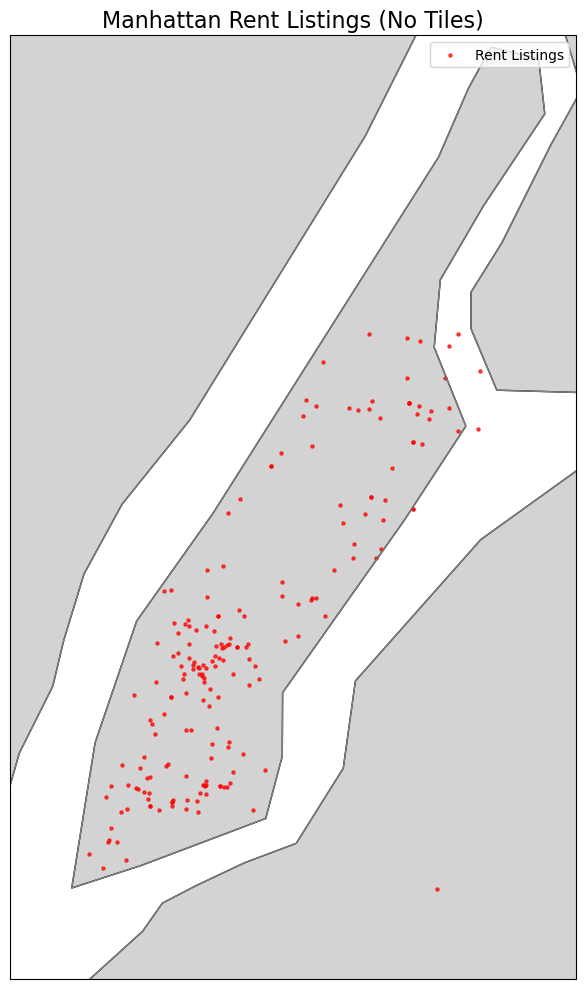

In [32]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point

# Load listings
listings = pd.read_csv("manhattan_listings_with_coordinates.csv")
listings = listings.dropna(subset=["longitude", "latitude"])
listings = listings[(listings["longitude"] < -73) & (listings["latitude"] > 40)]

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(listings["longitude"], listings["latitude"])]
gdf_listings = gpd.GeoDataFrame(listings, geometry=geometry, crs="EPSG:4326")

# Manhattan bounding box
min_lon, max_lon = -74.03, -73.91
min_lat, max_lat = 40.68, 40.88

# Plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Add basic features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, edgecolor='gray')

# Plot listings
ax.scatter(
    gdf_listings["longitude"],
    gdf_listings["latitude"],
    color='red',
    s=5,
    alpha=0.7,
    transform=ccrs.PlateCarree(),
    label='Rent Listings'
)

plt.title("Manhattan Rent Listings (No Tiles)", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()
